In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

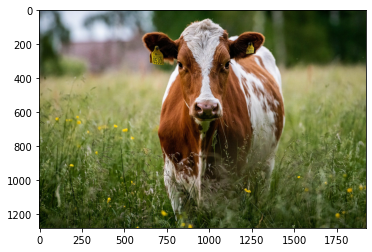

In [95]:
img = mpimg.imread('1.bmp')
imgplot = plt.imshow(img)

In [96]:
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

In [97]:
U_r, S_r, Vt_r = np.linalg.svd(r, full_matrices=True)
U_g, S_g, Vt_g = np.linalg.svd(g, full_matrices=True)
U_b, S_b, Vt_b = np.linalg.svd(b, full_matrices=True)

In [174]:
row, column = img.shape[0], img.shape[1] 

new_r = np.zeros((row, column))
new_g = np.zeros((row, column))
new_b = np.zeros((row, column))

k = 10

# by saving bellow matrices can cause file compression
new_U_r = U_r[:, :k]
new_S_r = S_r[:k]
new_Vt_r = Vt_r[:k, :]

new_U_g = U_g[:, :k]
new_S_g = S_g[:k]
new_Vt_g = Vt_g[:k, :]

new_U_b = U_b[:, :k]
new_S_b = S_b[:k]
new_Vt_b = Vt_b[:k, :]

In [175]:
for i in range(k):
    new_r += new_S_r[i] * np.dot(new_U_r[:, i:(i+1)], new_Vt_r[i:(i+1), :])
    new_g += new_S_g[i] * np.dot(new_U_g[:, i:(i+1)], new_Vt_g[i:(i+1), :])
    new_b += new_S_b[i] * np.dot(new_U_b[:, i:(i+1)], new_Vt_b[i:(i+1), :])

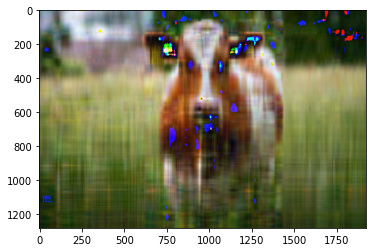

In [177]:
new_img = np.dstack((new_r,  new_g,  new_b))
new_img = new_img.astype((np.uint8))
imgplot_new_img = plt.imshow(new_img)